In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def forward_kinematics(angles: np.array):
    """_summary_

    Args:
        angles (np.array): shape (num_arms, num_joints)

    Returns:
        _type_: _description_
    """
    num_arms, num_joints = angles.shape
    positions = np.zeros((num_arms, num_joints + 1, 2))

    for idx in range(num_joints):
        origin = positions[:, idx]

        # new position
        new_pos = np.array([np.cos(angles[:, idx]), np.sin(angles[:, idx])]).T
        
        # translate position
        new_pos += origin

        positions[:, idx + 1] = new_pos

    return positions

In [4]:
# sample actions
num_actions = 1_00_000
num_joints = 10

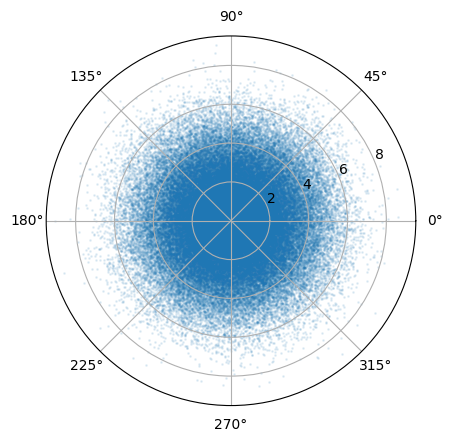

In [24]:
actions = np.random.uniform(0, np.pi * 2, size=(num_actions, num_joints))

fig = plt.figure()
ax = fig.add_subplot(projection='polar')

pos = forward_kinematics(actions)
# extract endpositions
end_pos = pos[:, -1]
# calculate values for polar plot
radius = np.sqrt(np.power(end_pos[:, 0], 2) + np.power(end_pos[:, 1], 2))
theta = np.arctan2(end_pos[:, 1], end_pos[:, 0])
ax.scatter(theta, radius, 1, alpha=0.1)



exctract distribution of x and y positions

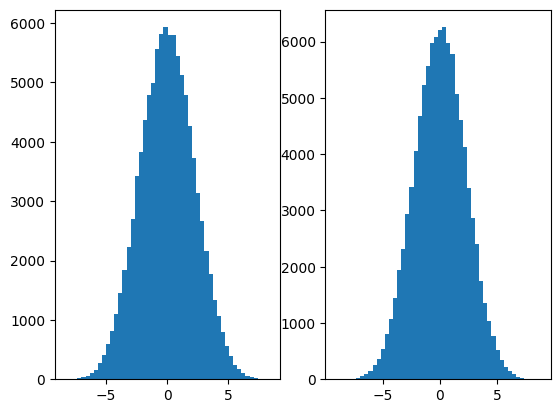

In [23]:
x = radius * np.cos(theta)
y = radius * np.sin(theta)

fig, axs = plt.subplots(1, 2)
axs[0].hist(x, bins=50)
axs[1].hist(y, bins=50)

x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.mean()

print()

In [25]:
decay = 0.5
# Doing the same thing but with a multi variate distribution... 
loc = np.zeros(num_joints)

# ... first time with a  sparse covariance matrix...
cov_matrix = np.eye(num_joints)
# add sparse diagonals
above = np.eye(num_joints) * decay
above = np.concatenate([above[1:], np.zeros((1, num_joints))])

below = np.eye(num_joints) * decay
below = np.concatenate([np.zeros((1, num_joints)), below[:-1]])

cov_matrix = cov_matrix + above + below

actions = np.random.multivariate_normal(np.zeros(num_joints), cov_matrix)
    

# ... second time with exp decay matrix

